# Actividad: Problemas de regresión

Si hay algún problema de visualización en el PDF, aquí se encuentra el link del Google Colab: https://colab.research.google.com/drive/131jT15Aew0VN02lvdThwCBziEB5l-SPW?usp=sharing

## Ejercicio 1 (50 puntos)

El conjunto de datos de criminalidad ***datos de criminalidad*** de Estados Unidos publicado en el año 1993 consiste de 51 registros para los que se tienen las siguientes variables:

VR = crímenes violentos por cada 100000 habitantes

MR = asesinatos por cada 100000 habitantes

M = porcentaje de áreas metropolitanas

W = porcentaje de gente blanca

H = porcentaje de personas con preparatoria terminada

P = porcentaje con ingresos por debajo del nivel de pobreza

S = porcentaje de familias con solo un miembro adulto como tutor

Para este conjunto de datos:

**Nota 1:** Las variables con las que vas a trabajar depende del último número de tu matrícula de acuerdo a la siguiente lista:

- 0 Variable dependiente VR, variables independientes M, W, H y P
- 1 Variable dependiente VR, variables independientes M, W, H y S
- 2 Variable dependiente VR, variables independientes M, W,  S y P
- 3 Variable dependiente VR, variables independientes M, H, S y P
- 4 Variable dependiente MR, variables independientes M, W, H y P **(Este me tocó a mi)**
- 5 Variable dependiente MR, variables independientes M, W, H y S
- 6 Variable dependiente MR, variables independientes M, W,  S y P
- 7 Variable dependiente MR, variables independientes M, H, S y P
- 8 Variable dependiente VR, variables independientes M, W, H, P y S
- 9 Variable dependiente MR, variables independientes M, W, H, P y S

***Nota 2:*** El método de validación cruzada a utilizar en el punto 4 depende de tu número de matrícula. Si es impar, se pide LOOCV. Si es par, se pide el método Monte Carlo con al menos 100 particiones aleatorias.

### Procedimiento

In [ ]:
import math
import pandas as pd
import numpy as np
import numpy.linalg as ln
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/7mo Semestre/Colab Notebooks/DataSources/crime_data.csv')
df.head()

,State,VR,MR,M,W,H,P,S
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5


Eliminamos las columnas que no vamos a necesitar

In [ ]:
df = df.drop('VR', axis = 1)
df = df.drop('S', axis = 1)
df = df.drop('State', axis = 1)
df.head()

,MR,M,W,H,P
0,9.0,41.8,75.2,86.6,9.1
1,11.6,67.4,73.5,66.9,17.4
2,10.2,44.7,82.9,66.3,20.0
3,8.6,84.7,88.6,78.7,15.4
4,13.1,96.7,79.3,76.2,18.2


In [ ]:
df.count()
df

,MR,M,W,H,P
0,9.0,41.8,75.2,86.6,9.1
1,11.6,67.4,73.5,66.9,17.4
2,10.2,44.7,82.9,66.3,20.0
3,8.6,84.7,88.6,78.7,15.4
4,13.1,96.7,79.3,76.2,18.2
5,5.8,81.8,92.5,84.4,9.9
6,6.3,95.7,89.0,79.2,8.5
7,5.0,82.7,79.4,77.5,10.2
8,8.9,93.0,83.5,74.4,17.8
9,11.4,67.7,70.8,70.9,13.5


In [ ]:
x = df.iloc[:len(df), [-4,-3,-2,-1]].values
y = df.iloc[:len(df), 0].values
x

array([[ 41.8,  75.2,  86.6,   9.1],
       [ 67.4,  73.5,  66.9,  17.4],
       [ 44.7,  82.9,  66.3,  20. ],
       [ 84.7,  88.6,  78.7,  15.4],
       [ 96.7,  79.3,  76.2,  18.2],
       [ 81.8,  92.5,  84.4,   9.9],
       [ 95.7,  89. ,  79.2,   8.5],
       [ 82.7,  79.4,  77.5,  10.2],
       [ 93. ,  83.5,  74.4,  17.8],
       [ 67.7,  70.8,  70.9,  13.5],
       [ 74.7,  40.9,  80.1,   8. ],
       [ 43.8,  96.6,  80.1,  10.3],
       [ 30. ,  96.7,  79.7,  13.1],
       [ 84. ,  81. ,  76.2,  13.6],
       [ 71.6,  90.6,  75.6,  12.2],
       [ 54.6,  90.9,  81.3,  13.1],
       [ 48.5,  91.8,  64.6,  20.4],
       [ 75. ,  66.7,  68.3,  26.4],
       [ 96.2,  91.1,  80. ,  10.7],
       [ 92.8,  68.9,  78.4,   9.7],
       [ 35.7,  98.5,  78.8,  10.7],
       [ 82.7,  83.1,  76.8,  15.4],
       [ 69.3,  94. ,  82.4,  11.6],
       [ 68.3,  87.6,  73.9,  16.1],
       [ 30.7,  63.3,  64.3,  24.7],
       [ 24. ,  92.6,  81. ,  14.9],
       [ 66.3,  75.2,  70. ,  14.4],
 

1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

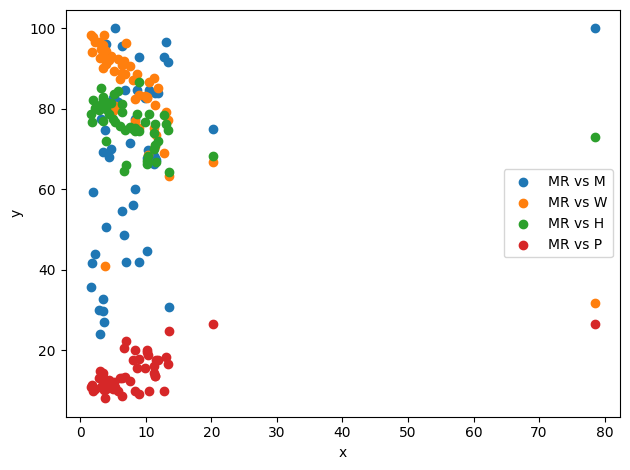

In [ ]:
fig1 = plt.figure()
fig1.clf()
ax1 = fig1.subplots(1,1)
ax1.scatter(y, df['M'], label='MR vs M')
ax1.scatter(y, df['W'], label='MR vs W')
ax1.scatter(y, df['H'], label='MR vs H')
ax1.scatter(y, df['P'], label='MR vs P')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.legend()
fig1.tight_layout()
fig1.show()

2. Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

Funciones de entrenamiento y predicción. Y le ponemos la columna de 1's a la matriz de variables predictoras.

In [ ]:
def fit_model(X, y):
    return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

def predict(X, beta):
    return X @ beta

X = np.column_stack((np.ones(x.shape[0]), x))
X

array([[  1. ,  41.8,  75.2,  86.6,   9.1],
       [  1. ,  67.4,  73.5,  66.9,  17.4],
       [  1. ,  44.7,  82.9,  66.3,  20. ],
       [  1. ,  84.7,  88.6,  78.7,  15.4],
       [  1. ,  96.7,  79.3,  76.2,  18.2],
       [  1. ,  81.8,  92.5,  84.4,   9.9],
       [  1. ,  95.7,  89. ,  79.2,   8.5],
       [  1. ,  82.7,  79.4,  77.5,  10.2],
       [  1. ,  93. ,  83.5,  74.4,  17.8],
       [  1. ,  67.7,  70.8,  70.9,  13.5],
       [  1. ,  74.7,  40.9,  80.1,   8. ],
       [  1. ,  43.8,  96.6,  80.1,  10.3],
       [  1. ,  30. ,  96.7,  79.7,  13.1],
       [  1. ,  84. ,  81. ,  76.2,  13.6],
       [  1. ,  71.6,  90.6,  75.6,  12.2],
       [  1. ,  54.6,  90.9,  81.3,  13.1],
       [  1. ,  48.5,  91.8,  64.6,  20.4],
       [  1. ,  75. ,  66.7,  68.3,  26.4],
       [  1. ,  96.2,  91.1,  80. ,  10.7],
       [  1. ,  92.8,  68.9,  78.4,   9.7],
       [  1. ,  35.7,  98.5,  78.8,  10.7],
       [  1. ,  82.7,  83.1,  76.8,  15.4],
       [  1. ,  69.3,  94. ,  82

In [ ]:
beta = fit_model(X, y)
print ("Coeficientes del modelo: ", beta)

Coeficientes del modelo:  [-39.36237505   0.08937732  -0.41776537   0.72531944   1.5371259 ]


Por lo tanto, nuestra equación del modelo es:

$MR = -39.36237505 + 0.08937732M - 0.41776537W + 0.72531944H + 1.5371259P$

o también puede quedar de esta manera:

$y = -39.36237505 + 0.08937732x_1 - 0.41776537x_2 + 0.72531944x_3 + 1.5371259x_4$

3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.

In [ ]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)

mse_cv = []
mae_cv = []
r2_cv = []
i = 0
for train_index, test_index in kf.split(x):

    # Fold number
    i += 1
    print('Pliegue: ', i)

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    beta_cv = fit_model(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]

    y_pred = predict(x_test, beta_cv)

    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)
    r2_cv.append(r2_i)
print('\nPromedios:')
print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

Pliegue:  1
mse =  271.23073144741585
mae =  6.293544292379615
r^2=  0.33004813717568793
Pliegue:  2
mse =  17.47234294199736
mae =  3.085508181234315
r^2=  -0.7501044655231943
Pliegue:  3
mse =  21.72942816301729
mae =  2.9562084846658436
r^2=  -0.9540149781498228
Pliegue:  4
mse =  114.04139442223898
mae =  5.702652264010936
r^2=  -10.776756002131336
Pliegue:  5
mse =  19.41379523263347
mae =  3.4897711290663764
r^2=  0.3086156771238384

Promedios:
MSE: 88.77753844146058   MAE: 4.305536870271418   R^2: -2.3684423263009657


4. Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de R^2 (sólo si es el método de Monte Carlo), MSE y MAE.

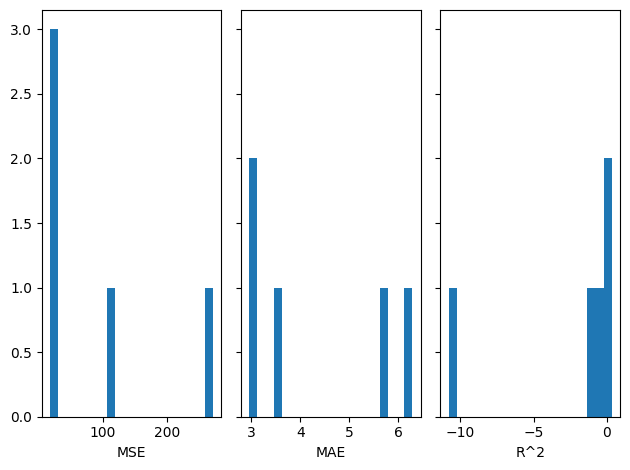

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(mse_cv, bins=20)
axs[0].set_xlabel("MSE")

axs[1].hist(mae_cv, bins=20)
axs[1].set_xlabel("MAE")

axs[2].hist(r2_cv, bins=20)
axs[2].set_xlabel("R^2")

plt.show()

5. Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, M2, W2), así como los productos entre pares de variables (por ejemplo, PxS, MxW). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

In [ ]:
df2 = pd.DataFrame({'M2':df['M']**2,
                    'W2':df['W']**2,
                    'H2':df['H']**2,
                    'P2':df['P']**2,
                    'MxW':df['M']*df['W'],
                    'MxH':df['M']*df['H'],
                    'MxP':df['M']*df['P'],
                    'WxH':df['W']*df['H'],
                    'WxP':df['W']*df['P'],
                    'HxP':df['H']*df['P']})
df2

,M2,W2,H2,P2,MxW,MxH,MxP,WxH,WxP,HxP
0,1747.24,5655.04,7499.56,82.81,3143.36,3619.88,380.38,6512.32,684.32,788.06
1,4542.76,5402.25,4475.61,302.76,4953.90,4509.06,1172.76,4917.15,1278.90,1164.06
2,1998.09,6872.41,4395.69,400.00,3705.63,2963.61,894.00,5496.27,1658.00,1326.00
3,7174.09,7849.96,6193.69,237.16,7504.42,6665.89,1304.38,6972.82,1364.44,1211.98
4,9350.89,6288.49,5806.44,331.24,7668.31,7368.54,1759.94,6042.66,1443.26,1386.84
5,6691.24,8556.25,7123.36,98.01,7566.50,6903.92,809.82,7807.00,915.75,835.56
6,9158.49,7921.00,6272.64,72.25,8517.30,7579.44,813.45,7048.80,756.50,673.20
7,6839.29,6304.36,6006.25,104.04,6566.38,6409.25,843.54,6153.50,809.88,790.50
8,8649.00,6972.25,5535.36,316.84,7765.50,6919.20,1655.40,6212.40,1486.30,1324.32
9,4583.29,5012.64,5026.81,182.25,4793.16,4799.93,913.95,5019.72,955.80,957.15


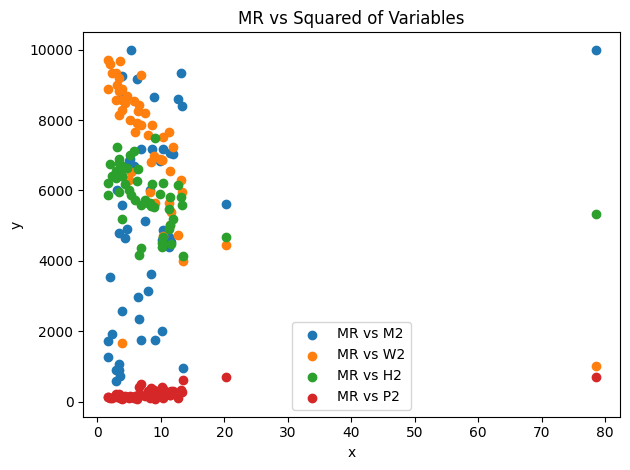

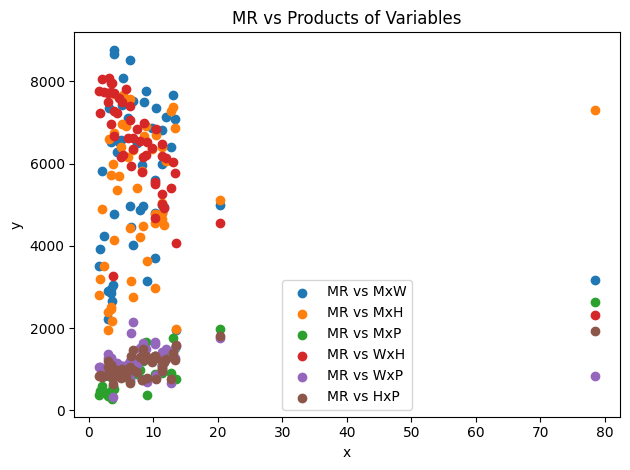

In [ ]:
# Squared Graphics
fig = plt.figure()
fig.clf()
ax = fig.subplots(1,1)
ax.scatter(y, df2['M2'], label='MR vs M2')
ax.scatter(y, df2['W2'], label='MR vs W2')
ax.scatter(y, df2['H2'], label='MR vs H2')
ax.scatter(y, df2['P2'], label='MR vs P2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('MR vs Squared of Variables')

ax.legend()
fig.tight_layout()
fig.show()

# Products Graphics
fig2 = plt.figure()
fig2.clf()
ax2 = fig2.subplots(1,1)
ax2.scatter(y, df2['MxW'], label='MR vs MxW')
ax2.scatter(y, df2['MxH'], label='MR vs MxH')
ax2.scatter(y, df2['MxP'], label='MR vs MxP')
ax2.scatter(y, df2['WxH'], label='MR vs WxH')
ax2.scatter(y, df2['WxP'], label='MR vs WxP')
ax2.scatter(y, df2['HxP'], label='MR vs HxP')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('MR vs Products of Variables')

ax2.legend()
fig2.tight_layout()
fig2.show()

Reasignamos la matriz $x$ a los valores nuevos y sacamos sus coeficientes.

In [ ]:
x = df2.iloc[:len(df), :].values
X = np.column_stack((np.ones(x.shape[0]), x))

beta = fit_model(X, y)
print ("Coeficientes del modelo: ", beta)

Coeficientes del modelo:  [ 8.30277443e+00 -2.27733557e-04  4.98335650e-03 -4.02463124e-03
  8.87748399e-03 -3.70576059e-03  3.90977162e-03  8.32063765e-03
 -2.71244655e-03 -3.98364740e-02  4.11012054e-02]


In [ ]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)

mse_cv = []
mae_cv = []
r2_cv = []
i = 0
for train_index, test_index in kf.split(x):

    # Fold number
    i += 1
    print('Pliegue: ', i)

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    beta_cv = fit_model(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]

    y_pred = predict(x_test, beta_cv)

    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)
    r2_cv.append(r2_i)
print('\nPromedios:')
print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

Pliegue:  1
mse =  182.9034684472948
mae =  6.666012946748256
r^2=  0.572633331567273
Pliegue:  2
mse =  34.484870032143554
mae =  4.222351118932272
r^2=  -1.2485488887388616
Pliegue:  3
mse =  134.27667028908039
mae =  4.9514836767410575
r^2=  -7.482363995747367
Pliegue:  4
mse =  8.774567953136703
mae =  2.6727853443909533
r^2=  -0.34808768810961954
Pliegue:  5
mse =  34.33715981301532
mae =  3.362934600768817
r^2=  -0.40573392884839476

Promedios:
MSE: 78.95534730693416   MAE: 4.375113537516271   R^2: -1.7824202339753938


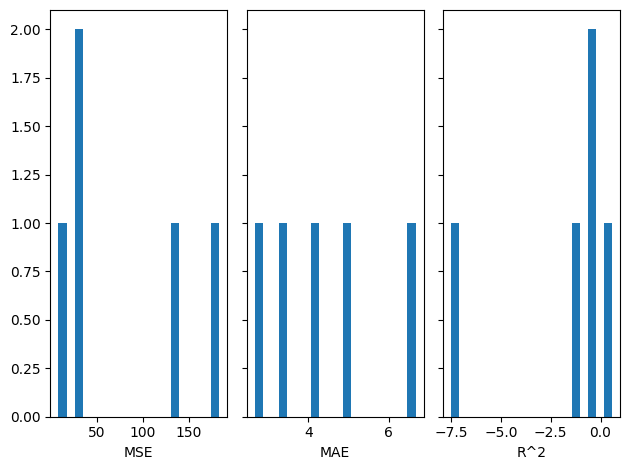

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(mse_cv, bins=20)
axs[0].set_xlabel("MSE")

axs[1].hist(mae_cv, bins=20)
axs[1].set_xlabel("MAE")

axs[2].hist(r2_cv, bins=20)
axs[2].set_xlabel("R^2")

plt.show()

6. Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).

In [ ]:
def grad(X, y, beta, lambd):
  n = len(y)
  y_pred = X @ beta
  res = y - y_pred
  tmp = res*X.transpose()
  return -(2/n)*tmp.sum(axis = 1) + 2*lambd*beta

def fit_model2(X, y, lambd = 0.01, alpha = 0.0005, maxit = 100000):

  npredictors = X.shape[1]

  beta = 2*np.random.rand(npredictors) - 1.0

  it = 0
  while (ln.norm(grad(X, y, beta, lambd)) > 1e-4) and (it < maxit):
    beta = beta - alpha*grad(X, y, beta, lambd)

  return beta

Reasignamos nuevamente la matriz $x$ a los valores originales y los estandarizamos.

In [ ]:
x = df.iloc[:len(df), [-4,-3,-2,-1]].values
X = np.column_stack((np.ones(x.shape[0]), x))
scaler = StandardScaler()
X = scaler.fit_transform(X)

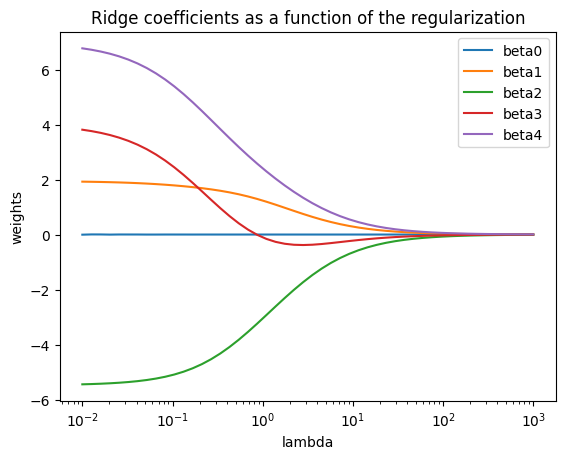

In [ ]:
beta_real = [5, -3, 4, 15, 10]
lambdas = np.logspace(-2, 3, 50)
coefs = []
for l in lambdas:
  beta = fit_model2(X, y, l) # Ridge
  #print(beta)
  coefs.append(beta)

axis = plt.gca()
lineObjects = axis.plot(lambdas, coefs)
axis.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

features = ["beta"+str(feat) for feat in range(len(beta_real))]
axis.legend(iter(lineObjects), features)

plt.show()

7. Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?

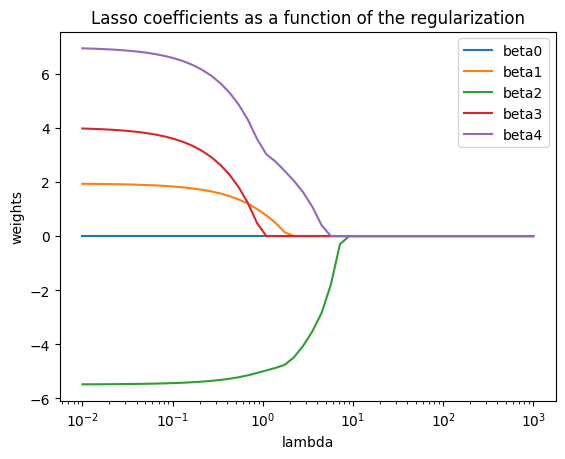

In [ ]:
beta_real = [5, -3, 4, 15, 10]
lambdas = np.logspace(-2, 3, 50)
coefs = []
for l in lambdas:
  beta = linear_model.Lasso(alpha=l).fit(X, y, l) # Lasso
  #print(beta)
  coefs.append(beta.coef_)

axis = plt.gca()
lineObjects = axis.plot(lambdas, coefs)
axis.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')

features = ["beta"+str(feat) for feat in range(len(beta_real))]
axis.legend(iter(lineObjects), features)

plt.show()

Como podemos observar en base a la grafica Lasso, el orden de importancia de las variables es el siguiente:

1. $Beta 2 (W)$
2. $Beta 4 (P)$
3. $Beta 1 (M)$
4. $Beta 3 (H)$
5. $Beta 0 ()$

8. Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

**¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?**

*No, porque si vemos nuestras $MSE, MAE,$ y $R^2$, podemos ver los promedios del modelo con las variables originales:*

Promedios:
- **MSE:** 92.44650231008957   
- **MAE:** 4.484717016414039   
- **$R^2$:** -1.6935607957270515

*y con las variables elevadas al cuadrado y del producto de las variables:*

Promedios:
- **MSE:** 105.72687878108813   
- **MAE:** 4.585912349529447   
- **$R^2:$** -3.2513749501075795

*Podemos notar, que los errores son muy altos y la $R^2$ es muy mala, tanto que es negativa, cuando se supone que oscila entre 0 y 1, siendo 1 el caso en el que el modelo predice perfectamente la variabilidad de la variable de respuesta, y siendo 0 el caso en el que el modelo no refleja para nada la variabilidad de la variable de respuesta.*

**¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.**

- ***Modelo con las variables originales:***

  Pliegue:  1
  - mse =  282.29350053280484
  - mae =  6.743418326421403
  - r^2=  0.3492252518131115

  Pliegue:  2
  - mse =  12.126084693116537
  - mae =  2.4982000455867293
  - r^2=  -0.3995942628250848

  Pliegue:  3
  - mse =  46.03817899590251
  - mae =  4.789646783582758
  - r^2=  -0.5031353233110285

  Pliegue:  4
  - mse =  113.84555043227226
  - mae =  6.052339106432852
  - r^2=  -8.334663039707467

  Pliegue:  5
  - mse =  7.929196896351695
  - mae =  2.339980820046452
  - r^2=  0.4203633953952093

- ***Modelo con las variables cuadradas y de productos:***

  Pliegue:  1
  - mse =  124.28963254635005
  - mae =  4.848599078978612
  - r^2=  -12.188211882516052

  Pliegue:  2
  - mse =  31.200844038706162
  - mae =  3.305701846664443
  - r^2=  -0.5010797878678588
  
  Pliegue:  3
  - mse =  9.386295979799176
  - mae =  2.715326247882306
  - r^2=  0.3708115658294838
  
  Pliegue:  4
  - mse =  327.2087802439065
  - mae =  8.08893396919036
  - r^2=  0.2798119896554845
  
  Pliegue:  5
  - mse =  36.5488410966788
  - mae =  3.971000604931511
  - r^2=  -4.218206635638954

*Como podemos observar en ambos modelos, hay una variabilidad muy notoria en dichas variables, esto se debe a que con cada particion del modelo, se utilizaron distintos subcojuntos de datos para entrenar y testear al modelo, por lo que es esperado que tenga esta variabilidad.*

**¿Qué modelo es mejor para los datos de criminalidad, el lineal o el cuadrático? ¿Por qué?**

*Para este conjunto de datos y con las variables que se nos asignaron, es mejor el modelo lineal, porque este tiene menor margen de error en $MAE$ y $MSE$, además tambien la $R^2$ es más cercana a cero*

**¿Qué variables son más relevantes para el modelo según Ridge y Lasso?**

*Según Ridge, el orden de importancia/relevancia es:*
1. Beta 2 (W)
2. Beta 4 (P)
3. Beta 1 (M)
4. Beta 3 (H)
5. Beta 0 ()

*Según Lasso, el orden de importancia/relevancia es:*

1. Beta 2 (W)
2. Beta 4 (P)
3. Beta 1 (M)
4. Beta 3 (H)
5. Beta 0 ()

**¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?**

*Solamente que las variables $x$ tienden a ser valores de 0 a 20, y que graficandolas en relación con $y$, las variables $W, H,$ y $P$ tienden a estar agrupadas en una sola area, solo la variable $M$ es la unica que no tiende a tener una región especifica.*


## Ejercicio 2 (50 puntos)

El conjunto de datos de esperanzas de vida tiene el registro de la esperanza de vida de 193 países medida en diferentes años, junto con otras variables que se pueden relacionar con riesgos a la salud y la mortalidad. Para este ejercicio, sólo se considerará como variable dependiente la cuarta columna ("Life expectancy"). A su vez, las variables independientes de interés son:

- X1 - Adult mortality
- X2 - Infant deaths
- X3 - Alcohol
- X4 - Percentage expenditure
- X5 - Hepatitis B
- X6 - Measles
- X7 - BMI
- X8 - Under-five deaths
- X9 - Polio
- X10 - Total expenditure
- X11 - Diphtheria
- X12 - HIV/AIDS   
- X13 - GDP
- X14 - Population
- X15 - Thinness  1-19 years
- X16 - Thinness 5-9 years
- X17 - Income composition of resources
- X18 - Schooling

Para este conjunto de datos:

1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.
2. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.
3. Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.
4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo (Filter-Wrapper). Reporta los predictores óptimos encontrados por el método.
5. Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.
6. Agregue la variables "Status" (segunda columna) como variable predictora, y utiliza un árbol de decisión para generar un modelo de regresión para la varible Life expectancy". Evalúa este modelo con validación cruzada utilizando la métrica adecuada.
7. Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:
  - Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?
  - ¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?
  - Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?
  - ¿El modelo de regresión no lineal funcionó mejor que el lineal? ¿Por qué?
  - ¿Notas alguna mejora con el árbol de decisión al agregar la variable categórica "Status"? ¿Por qué?
  - ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.

**Nota 1: Las variables con las que vas a trabajar depende del penúltimo número de tu matrícula de acuerdo a la siguiente lista:**
- 0, 1 - Todas las variables, menos X1, X5, X9, X13, X17
- 2, 3 - Todas las variables, menos X2, X6, X10, X14, X18
- 4, 5 - Todas las variables, menos X3, X7, X11, X15
- 6, 7 - Todas las variables, menos X4, X8, X12, X16
- 8, 9 - Todas las variables, menos X5, X9, X13, X17

### Procedimiento

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, r_regression, SequentialFeatureSelector, RFE

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/7mo Semestre/Colab Notebooks/DataSources/life_expectancy_data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df = df.drop('Country', axis = 1)
df = df.drop('Year', axis = 1)
df = df.drop('Status', axis = 1)
df = df.drop('Hepatitis B', axis = 1) # X5
df = df.drop('Polio', axis = 1) # X9
df = df.drop('GDP', axis = 1) # X13
df = df.drop('Income composition of resources', axis = 1) # X17
df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Schooling
0,65.0,263.0,62,0.01,71.279624,1154,19.1,83,8.16,65.0,0.1,33736494.0,17.2,17.3,10.1
1,59.9,271.0,64,0.01,73.523582,492,18.6,86,8.18,62.0,0.1,327582.0,17.5,17.5,10.0
2,59.9,268.0,66,0.01,73.219243,430,18.1,89,8.13,64.0,0.1,31731688.0,17.7,17.7,9.9
3,59.5,272.0,69,0.01,78.184215,2787,17.6,93,8.52,67.0,0.1,3696958.0,17.9,18.0,9.8
4,59.2,275.0,71,0.01,7.097109,3013,17.2,97,7.87,68.0,0.1,2978599.0,18.2,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,31,27.1,42,7.13,65.0,33.6,12777511.0,9.4,9.4,9.2
2934,44.5,715.0,26,4.06,0.000000,998,26.7,41,6.52,68.0,36.7,12633897.0,9.8,9.9,9.5
2935,44.8,73.0,25,4.43,0.000000,304,26.3,40,6.53,71.0,39.8,125525.0,1.2,1.3,10.0
2936,45.3,686.0,25,1.72,0.000000,529,25.9,39,6.16,75.0,42.1,12366165.0,1.6,1.7,9.8


In [ ]:
df.isnull().sum()

Life expectancy            10
Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Measles                     0
 BMI                       34
under-five deaths           0
Total expenditure         226
Diphtheria                 19
 HIV/AIDS                   0
Population                652
 thinness  1-19 years      34
 thinness 5-9 years        34
Schooling                 163
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Life expectancy           0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Measles                   0
 BMI                      0
under-five deaths         0
Total expenditure         0
Diphtheria                0
 HIV/AIDS                 0
Population                0
 thinness  1-19 years     0
 thinness 5-9 years       0
Schooling                 0
dtype: int64

In [ ]:
x = df.iloc[:len(df), 1:].values
y = df.iloc[:len(df), 0].values

array([65. , 59.9, 59.9, ..., 44.8, 45.3, 46. ])

1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [ ]:
reg = LinearRegression()

In [ ]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)

mse_cv = []
mae_cv = []
r2_cv = []
i = 0
for train_index, test_index in kf.split(x):

    # Fold number
    i += 1
    print('Pliegue: ', i)

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    beta_cv = reg.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]

    y_pred = reg.predict(x_test)

    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)
    r2_cv.append(r2_i)
print('\nPromedios:')
print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

Pliegue:  1
mse =  15.379317723673168
mae =  3.0528967224536823
r^2=  0.8339279850704651
Pliegue:  2
mse =  16.53370085065401
mae =  3.1209829981385786
r^2=  0.8414507477877202
Pliegue:  3
mse =  15.414879794241083
mae =  3.0107047608109645
r^2=  0.8423702878952705
Pliegue:  4
mse =  16.586500523136863
mae =  3.0546013533993204
r^2=  0.8321726203289961
Pliegue:  5
mse =  16.883623806638745
mae =  3.0394173422207116
r^2=  0.8212261668198058

Promedios:
MSE: 16.159604539668774   MAE: 3.0557206354046516   R^2: 0.8342295615804515


2. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

---- n features = 1
MSE: 38.393901289458725   MAE: 4.695076861330072   R^2: 0.6058693660938322
---- n features = 2
MSE: 35.9761400941168   MAE: 4.591605392106528   R^2: 0.6288932477373814
---- n features = 3
MSE: 34.60131723024789   MAE: 4.489745809856855   R^2: 0.645514537574903
---- n features = 4
MSE: 33.80822601189504   MAE: 4.429240362334822   R^2: 0.6512475996411557
---- n features = 5
MSE: 33.152377904325064   MAE: 4.379208864244324   R^2: 0.6590262190841962
---- n features = 6
MSE: 33.0287586140244   MAE: 4.37389568676134   R^2: 0.6600559729137961
---- n features = 7
MSE: 32.927202141091115   MAE: 4.3698828780916585   R^2: 0.6613842976422724
---- n features = 8
MSE: 32.973051510774454   MAE: 4.367151342971054   R^2: 0.6610780027626427
---- n features = 9
MSE: 32.97039641535186   MAE: 4.366552810851511   R^2: 0.6603006954340931
---- n features = 10
MSE: 31.404838668704393   MAE: 4.248159213988889   R^2: 0.6768388725045268
---- n features = 11
MSE: 30.808977159033834   MAE: 4.222

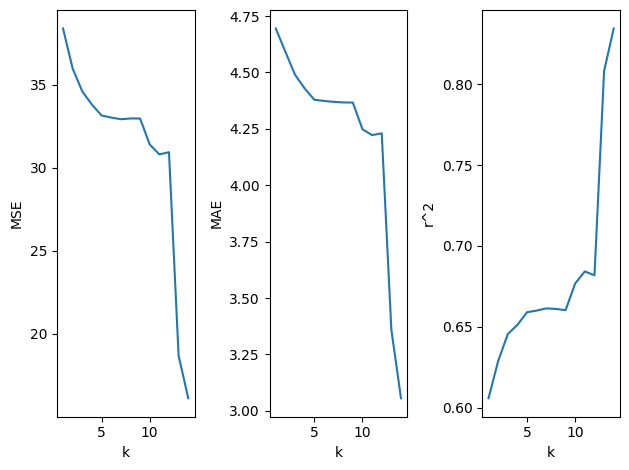

In [ ]:
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for j in range(x.shape[1]):
  print('---- n features =', j+1)
  mse_cv = []
  mae_cv = []
  r2_cv = []

  kf = KFold(n_splits=5, shuffle = True)

  for train_index, test_index in kf.split(x):

      # Training phase
      x_train = x[train_index, :]
      y_train = y[train_index]

      fselection_cv = SelectKBest(r_regression, k = j+1)
      fselection_cv.fit(x_train, y_train)
      x_train = fselection_cv.transform(x_train)

      reg.fit(x_train, y_train)

      # Test phase
      x_test = fselection_cv.transform(x[test_index, :])
      y_test = y[test_index]
      y_pred = reg.predict(x_test)

      mse_i = mean_squared_error(y_test, y_pred)
      mse_cv.append(mse_i)

      mae_i = mean_absolute_error(y_test, y_pred)
      mae_cv.append(mae_i)

      r2_i = r2_score(y_test, y_pred)
      r2_cv.append(r2_i)


  mse = np.average(mse_cv)
  mse_nfeat.append(mse)

  mae = np.average(mae_cv)
  mae_nfeat.append(mae)

  r2 = np.average(r2_cv)
  r2_nfeat.append(r2)

  print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")

plt.show()


Como podemos observar en las graficas del $MAE, MSE,$ y $R^2$ a lo largo de la variacion del numero de features $(k)$, mientras más features tenga, mejor será el modelo, porque los errores bajan y la $R^2$ sube.

Así que el numero óptimo de variables/features, es el máximo, que es 14. Así que las features seleccionadas son (todas):

- X1 - Adult mortality
- X2 - Infant deaths
- X3 - Alcohol
- X4 - Percentage expenditure
- X5 - Measles
- X6 - BMI
- X7 - Under-five deaths
- X8 - Total expenditure
- X9 - Diphtheria
- X10 - HIV/AIDS   
- X11 - Population
- X12 - Thinness  1-19 years
- X13 - Thinness 5-9 years
- X14 - Schooling




3. Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

---- n features = 1
MSE: 38.415006154019146   MAE: 4.696224241655497   R^2: 0.6055597176345743
---- n features = 2
MSE: 22.640630349064804   MAE: 3.6795995980941236   R^2: 0.7665655793900444
---- n features = 3
MSE: 19.189133839208548   MAE: 3.3194588371289058   R^2: 0.802839768773139
---- n features = 4
MSE: 18.459561951965327   MAE: 3.2658156750551384   R^2: 0.8105557966956394
---- n features = 5
MSE: 17.57471437829729   MAE: 3.189988335913504   R^2: 0.8191412563837523
---- n features = 6
MSE: 17.11108412725674   MAE: 3.1507421299662774   R^2: 0.8245788172657263
---- n features = 7
MSE: 17.177107369028185   MAE: 3.156005188879056   R^2: 0.823569757292824
---- n features = 8
MSE: 17.10543834827669   MAE: 3.152502706920584   R^2: 0.824523420065072
---- n features = 9
MSE: 16.881371771802225   MAE: 3.1339745303094655   R^2: 0.8266653398747514
---- n features = 10
MSE: 17.066288712463273   MAE: 3.150311234842899   R^2: 0.8244476874716667
---- n features = 11
MSE: 17.05562144303828   MAE:

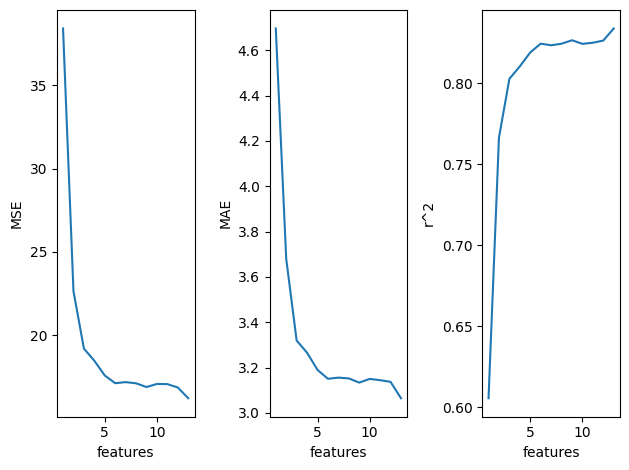

In [ ]:
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        fselection_cv = SequentialFeatureSelector(reg, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        reg.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = reg.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)


    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

Al igual que el metodo filter, las $MSE, MAE,$ y $R^2$ nos indican que el mejor modelo es el que tiene el maximo de variables predictoras.

Así que el numero óptimo de variables/features, según Wrapper, es el máximo, que es 14. Así que las features seleccionadas son (todas):

- X1 - Adult mortality
- X2 - Infant deaths
- X3 - Alcohol
- X4 - Percentage expenditure
- X5 - Measles
- X6 - BMI
- X7 - Under-five deaths
- X8 - Total expenditure
- X9 - Diphtheria
- X10 - HIV/AIDS   
- X11 - Population
- X12 - Thinness  1-19 years
- X13 - Thinness 5-9 years
- X14 - Schooling


4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo (Filter-Wrapper). Reporta los predictores óptimos encontrados por el método.

---- n features = 1
MSE: 38.49060362341925   MAE: 4.702609639185961   R^2: 0.6051948591576861
---- n features = 2
MSE: 22.679044628441257   MAE: 3.678311546366615   R^2: 0.767236564605174
---- n features = 3
MSE: 22.242956263522135   MAE: 3.65860312637857   R^2: 0.7709868624698692
---- n features = 4
MSE: 22.374155844628923   MAE: 3.6638143828590843   R^2: 0.7693296434864448
---- n features = 5
MSE: 21.92237440592421   MAE: 3.637056733867196   R^2: 0.7738178665889913
---- n features = 6
MSE: 20.9541598489464   MAE: 3.5712195540621225   R^2: 0.7856018312979507
---- n features = 7
MSE: 20.01619233401778   MAE: 3.491237576597314   R^2: 0.7944835438488711
---- n features = 8
MSE: 19.210316629788885   MAE: 3.382690451323428   R^2: 0.8023340236592276
---- n features = 9
MSE: 19.320553349252272   MAE: 3.3845146225893146   R^2: 0.8021071269901932
---- n features = 10
MSE: 17.18929197504115   MAE: 3.1700129903293712   R^2: 0.8223628868184472
---- n features = 11
MSE: 16.79890394199053   MAE: 3.

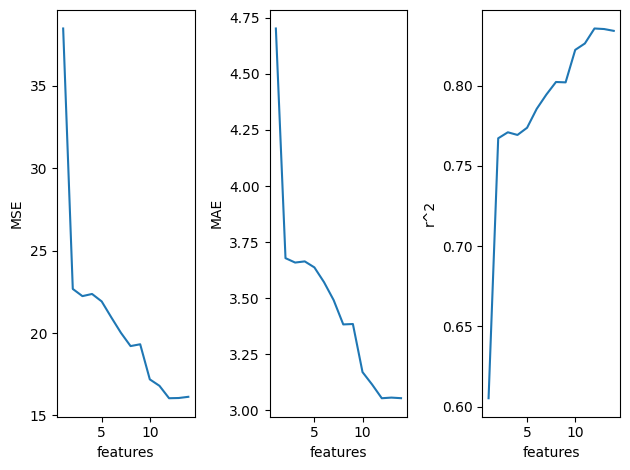

In [ ]:
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        fselection_cv = RFE(reg, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        reg.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = reg.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)


    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

Como podemos observar en las graficas del $MAE, MSE,$ y $R^2$ a lo largo de la variacion del numero de features $(k)$, en este caso, se nota una pequeña mejoría en los modelos si tienen solo 12 variables predictoras.

Asi que vamos a ver cuales son las variables que el metodo filter-wrapper nos recomienda cuando solo se seleccionan 12 variables:

In [ ]:
fselection = RFE(reg, n_features_to_select = 12)
fselection.fit(x, y)

print("Variables/Caracteristicas seleccionadas: ", fselection.get_feature_names_out())

Variables/Caracteristicas seleccionadas:  ['x0' 'x1' 'x2' 'x3' 'x5' 'x6' 'x7' 'x8' 'x9' 'x11' 'x12' 'x13']


5. Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.

Método Filter con Arboles de decisión

---- n features = 1
MSE: 38.49319114006425   MAE: 4.6740369709343845   R^2: 0.6032286007363833
---- n features = 2
MSE: 44.26608104004071   MAE: 4.717808223051691   R^2: 0.5442108316504417
---- n features = 3
MSE: 32.36007923594616   MAE: 3.8059024431625375   R^2: 0.6653786920913201
---- n features = 4
MSE: 26.043852426196132   MAE: 3.1840618708290918   R^2: 0.7321975238298695
---- n features = 5
MSE: 25.709848410813255   MAE: 3.1752632055197383   R^2: 0.7363473457853048
---- n features = 6
MSE: 21.84357156430268   MAE: 2.8579651623119555   R^2: 0.7761925714840849
---- n features = 7
MSE: 22.63760382309694   MAE: 2.9168266033254158   R^2: 0.7629271524188879
---- n features = 8
MSE: 24.63882020133469   MAE: 3.102049089469517   R^2: 0.7463635849880094
---- n features = 9
MSE: 18.293490193417036   MAE: 2.6119212758737698   R^2: 0.8119643825501353
---- n features = 10
MSE: 17.430662085736905   MAE: 2.489469403913584   R^2: 0.820208765292675
---- n features = 11
MSE: 16.684997918787467   MA

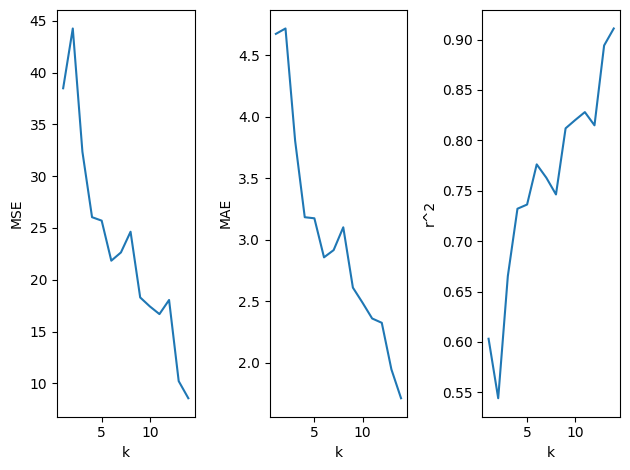

In [ ]:
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for j in range(x.shape[1]):
  print('---- n features =', j+1)
  mse_cv = []
  mae_cv = []
  r2_cv = []

  kf = KFold(n_splits=5, shuffle = True)

  for train_index, test_index in kf.split(x):

      # Training phase
      x_train = x[train_index, :]
      y_train = y[train_index]

      fselection_cv = SelectKBest(r_regression, k = j+1)
      fselection_cv.fit(x_train, y_train)
      x_train = fselection_cv.transform(x_train)

      regtree = DecisionTreeRegressor(random_state=0)
      regtree.fit(x_train, y_train)

      # Test phase
      x_test = fselection_cv.transform(x[test_index, :])
      y_test = y[test_index]
      y_pred = regtree.predict(x_test)

      mse_i = mean_squared_error(y_test, y_pred)
      mse_cv.append(mse_i)

      mae_i = mean_absolute_error(y_test, y_pred)
      mae_cv.append(mae_i)

      r2_i = r2_score(y_test, y_pred)
      r2_cv.append(r2_i)


  mse = np.average(mse_cv)
  mse_nfeat.append(mse)

  mae = np.average(mae_cv)
  mae_nfeat.append(mae)

  r2 = np.average(r2_cv)
  r2_nfeat.append(r2)

  print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")

plt.show()

Como podemos observar en las graficas del $MAE, MSE,$ y $R^2$ a lo largo de la variacion del numero de features $(k)$, mientras más features tenga, mejor será el modelo, porque los errores bajan y la $R^2$ sube.

Así que el numero óptimo de variables/features, es el máximo, que es 14. Así que las features seleccionadas son (todas):

- X1 - Adult mortality
- X2 - Infant deaths
- X3 - Alcohol
- X4 - Percentage expenditure
- X5 - Measles
- X6 - BMI
- X7 - Under-five deaths
- X8 - Total expenditure
- X9 - Diphtheria
- X10 - HIV/AIDS   
- X11 - Population
- X12 - Thinness  1-19 years
- X13 - Thinness 5-9 years
- X14 - Schooling


Método Wrapper con Arboles de decisión

---- n features = 1
MSE: 26.460868788184104   MAE: 3.0878973895227797   R^2: 0.7285600467447293
---- n features = 2
MSE: 10.250967985290533   MAE: 2.063095292360263   R^2: 0.8935523564883241
---- n features = 3
MSE: 9.137943247684401   MAE: 1.9299439166006862   R^2: 0.9061695469731138
---- n features = 4
MSE: 10.341862391132224   MAE: 1.8980518040945593   R^2: 0.8937441860370157
---- n features = 5
MSE: 8.12842497455039   MAE: 1.7257473136523018   R^2: 0.916476878226218
---- n features = 6
MSE: 9.488379629001244   MAE: 1.850334464427101   R^2: 0.9027285714277863
---- n features = 7
MSE: 9.970024341137883   MAE: 1.9092555140821177   R^2: 0.8966432491821049
---- n features = 8
MSE: 7.513631795045811   MAE: 1.6859863137654112   R^2: 0.92263732313682
---- n features = 9
MSE: 7.736046261735099   MAE: 1.6532937450514649   R^2: 0.9205111313632731
---- n features = 10
MSE: 8.104962063115034   MAE: 1.722158126908721   R^2: 0.9169269026202244
---- n features = 11
MSE: 7.842651125438299   MAE: 1.

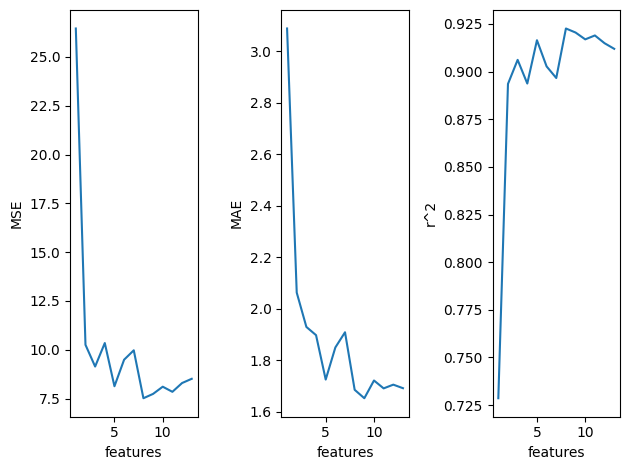

In [ ]:
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        regtree = DecisionTreeRegressor(random_state=0)

        fselection_cv = SequentialFeatureSelector(regtree, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regtree.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regtree.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)


    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

Como podemos observar en las graficas del $MAE, MSE,$ y $R^2$ a lo largo de la variacion del numero de features $(k)$, en este caso, se nota una pequeña mejoría en los modelos si tienen solo 8 variables predictoras.

Asi que vamos a ver cuales son las variables que el metodo wrapper nos recomienda cuando solo se seleccionan 8 variables:

In [ ]:
fselection = SequentialFeatureSelector(regtree, n_features_to_select=8)
fselection.fit(x, y)

print("Variables/Caracteristicas seleccionadas: ", fselection.get_feature_names_out())

Variables/Caracteristicas seleccionadas:  ['x0' 'x1' 'x2' 'x5' 'x7' 'x8' 'x11' 'x14']


Método Filter-Wrapper con Arboles de decisión

---- n features = 1
MSE: 34.19563991550992   MAE: 4.518875619238045   R^2: 0.6492335197392214
---- n features = 2
MSE: 15.826662830611474   MAE: 2.7786836101451087   R^2: 0.8368568901009394
---- n features = 3
MSE: 9.060344177066444   MAE: 1.8959666515854168   R^2: 0.9066623646199622
---- n features = 4
MSE: 7.968466293405723   MAE: 1.6773628548806698   R^2: 0.9180784950275023
---- n features = 5
MSE: 8.173675828526184   MAE: 1.645393733740527   R^2: 0.9155904716423127
---- n features = 6
MSE: 7.713295928062436   MAE: 1.6260632281416132   R^2: 0.9209667766191064
---- n features = 7
MSE: 7.439075715416808   MAE: 1.5574819590544056   R^2: 0.9238093534102229
---- n features = 8
MSE: 6.882413256418959   MAE: 1.5218090713720167   R^2: 0.9294524676212358
---- n features = 9
MSE: 8.49691430833616   MAE: 1.6435810428684536   R^2: 0.9128678064695219
---- n features = 10
MSE: 7.934085895260718   MAE: 1.6472898993326548   R^2: 0.9185402794314896
---- n features = 11
MSE: 8.611308166497002   MAE: 

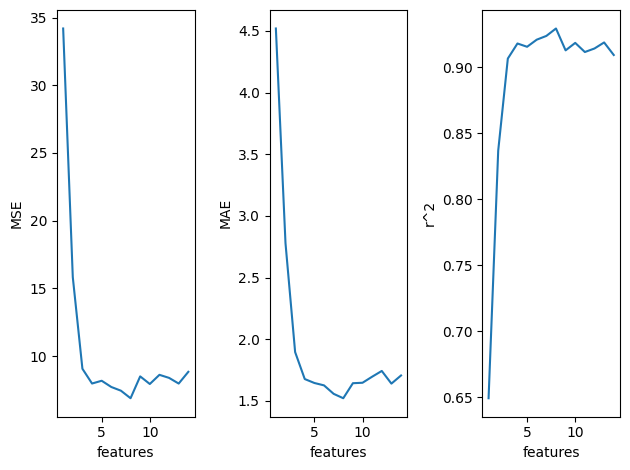

In [ ]:
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        regtree = DecisionTreeRegressor(random_state=0)

        fselection_cv = RFE(regtree, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regtree.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regtree.predict(x_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)


    mse = np.average(mse_cv)
    mse_nfeat.append(mse)

    mae = np.average(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

Como podemos observar en las graficas del $MAE, MSE,$ y $R^2$ a lo largo de la variacion del numero de features $(k)$, en este caso, se nota una pequeña mejoría en los modelos si tienen solo 8 variables predictoras.

Asi que vamos a ver cuales son las variables que el metodo Filter-Wrapper nos recomienda cuando solo se seleccionan 8 variables:

In [ ]:
fselection = RFE(regtree, n_features_to_select = 8)
fselection.fit(x, y)

print("Variables/Caracteristicas seleccionadas: ", fselection.get_feature_names_out())

Variables/Caracteristicas seleccionadas:  ['x0' 'x1' 'x3' 'x5' 'x7' 'x9' 'x12' 'x13']


6. Agregue la variables "Status" (segunda columna) como variable predictora, y utiliza un árbol de decisión para generar un modelo de regresión para la varible Life expectancy". Evalúa este modelo con validación cruzada utilizando la métrica adecuada.

Ajustamos el dataframe con los nuevos datos.

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/7mo Semestre/Colab Notebooks/DataSources/life_expectancy_data.csv')

In [ ]:
df2 = df2.drop('Country', axis = 1)
df2 = df2.drop('Year', axis = 1)
df2 = df2.drop('Hepatitis B', axis = 1) # X5
df2 = df2.drop('Polio', axis = 1) # X9
df2 = df2.drop('GDP', axis = 1) # X13
df2 = df2.drop('Income composition of resources', axis = 1) # X17
df2 = df2.dropna()
df2

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Schooling
0,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,8.16,65.0,0.1,33736494.0,17.2,17.3,10.1
1,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,8.18,62.0,0.1,327582.0,17.5,17.5,10.0
2,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,8.13,64.0,0.1,31731688.0,17.7,17.7,9.9
3,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,8.52,67.0,0.1,3696958.0,17.9,18.0,9.8
4,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,7.87,68.0,0.1,2978599.0,18.2,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,42,7.13,65.0,33.6,12777511.0,9.4,9.4,9.2
2934,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,41,6.52,68.0,36.7,12633897.0,9.8,9.9,9.5
2935,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,40,6.53,71.0,39.8,125525.0,1.2,1.3,10.0
2936,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,39,6.16,75.0,42.1,12366165.0,1.6,1.7,9.8


In [ ]:
df2['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

Reemplazamos en la columna Status, 'Developing' por un numero 1, y 'Developed' por un numero 2, para poder realizar el modelo de regresión.

In [ ]:
lif_exp = df2.pop('Life expectancy ')
df2.insert(0, 'Life expectancy', lif_exp)
df2['Status'].replace('Developing', 1, inplace=True)
df2['Status'].replace('Developed', 2, inplace=True)
df2

,Life expectancy,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Schooling
0,65.0,1,263.0,62,0.01,71.279624,1154,19.1,83,8.16,65.0,0.1,33736494.0,17.2,17.3,10.1
1,59.9,1,271.0,64,0.01,73.523582,492,18.6,86,8.18,62.0,0.1,327582.0,17.5,17.5,10.0
2,59.9,1,268.0,66,0.01,73.219243,430,18.1,89,8.13,64.0,0.1,31731688.0,17.7,17.7,9.9
3,59.5,1,272.0,69,0.01,78.184215,2787,17.6,93,8.52,67.0,0.1,3696958.0,17.9,18.0,9.8
4,59.2,1,275.0,71,0.01,7.097109,3013,17.2,97,7.87,68.0,0.1,2978599.0,18.2,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,1,723.0,27,4.36,0.000000,31,27.1,42,7.13,65.0,33.6,12777511.0,9.4,9.4,9.2
2934,44.5,1,715.0,26,4.06,0.000000,998,26.7,41,6.52,68.0,36.7,12633897.0,9.8,9.9,9.5
2935,44.8,1,73.0,25,4.43,0.000000,304,26.3,40,6.53,71.0,39.8,125525.0,1.2,1.3,10.0
2936,45.3,1,686.0,25,1.72,0.000000,529,25.9,39,6.16,75.0,42.1,12366165.0,1.6,1.7,9.8


In [ ]:
x = df2.iloc[:len(df2), 1:].values
y = df2.iloc[:len(df2), 0].values

Creacion del modelo del arbol de decision con validacion cruzada.

In [ ]:
kf = KFold(n_splits=5, shuffle = True)

mse_cv = []
mae_cv = []
r2_cv = []
i = 0
for train_index, test_index in kf.split(x):

    # Fold number
    i += 1
    print('Pliegue: ', i)

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    regtree = DecisionTreeRegressor(random_state=0)
    beta_cv = regtree.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]

    y_pred = regtree.predict(x_test)

    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)
    r2_cv.append(r2_i)
print('\nPromedios:')
print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

Pliegue:  1
mse =  7.010760095011876
mae =  1.5840855106888363
r^2=  0.9230400640492028
Pliegue:  2
mse =  9.499477434679335
mae =  1.7714964370546322
r^2=  0.9123566655337889
Pliegue:  3
mse =  5.677885985748217
mae =  1.5142517814726844
r^2=  0.9422408756999572
Pliegue:  4
mse =  6.146619047619048
mae =  1.55
r^2=  0.9359585002725792
Pliegue:  5
mse =  9.183690476190476
mae =  1.7126190476190475
r^2=  0.9018048325636567

Promedios:
MSE: 7.503686607849791   MAE: 1.6264905553670403   R^2: 0.9230801876238368


7. Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:
  - **Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?**

    - Regresion lineal con validación cruzada:
      
      Promedios:
      - MSE: 16.159604539668774   
      - MAE: 3.0557206354046516   
      - R^2: 0.8342295615804515

    - Regresión lineal con validacion cruzada y metodo filter (14 features)
      - MSE: 16.117705508724374   
      - MAE: 3.0556554560793456   
      - R^2: 0.8343935762898221
    - Regresión lineal con validacion cruzada y metodo wrapper (13 features)
      - MSE: 16.208541110821855   
      - MAE: 3.0650662154723634   
      - R^2: 0.8339347689995795
    - Regresión lineal con validacion cruzada y metodo filter-wrapper (12 features)
      - MSE: 16.04422509928919   
      - MAE: 3.053484996791867   
      - R^2: 0.8356933517846217
    
  *Como podemos observar, el modelo de regresion lineal, da muy buenos resultados, relativamente. Pero si comparamos sus valores con los valores de un modelo no lineal como los arboles de decisión que oscilan entre los siguiente valores:*

    - MSE: 6.882413256418959   
    - MAE: 1.5218090713720167   
    - R^2: 0.9294524676212358

  *No solo su $R^2$ es mayor, y por lo tanto, mejor; si no que sus errores tambien son menores. Por lo que se puede inferir que es un mejor modelo que el lineal*

  *Por lo tanto, un modelo lineal, si bien es bastante bueno, hay al menos un modelo que puede predecir mejor la variable de respuesta que el modelo lineal*


  - **¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?**
  
    - Método Filter (14 features) con arboles de decisión
      - MSE: 8.560129385816081   
      - MAE: 1.7129597330618709   
      - R^2: 0.9110017162402876
    - Método Wrapper (8 features) con arboles de decisión
      - MSE: 7.513631795045811   
      - MAE: 1.6859863137654112   
      - R^2: 0.92263732313682
    - Método Filter-Wrapper (8 features) con arboles de decisión
      - MSE: 6.882413256418959   
      - MAE: 1.5218090713720167   
      - R^2: 0.9294524676212358

  
  *Si observamos los resultados, tanto como en los modelos lineales como en los modelos de arboles de decisión, nos podemos percatar que en ambos, el método que dió mejores resultados para este conjunto de datos, fue el método Filter-Wrapper.*

  - Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?
  
    - X1 - Adult mortality
    - X2 - Infant deaths
    - X4 - Percentage expenditure
    - X6 - BMI
    - X8 - Total expenditure
    - X10 - HIV/AIDS   
    - X13 - Thinness 5-9 years
    - X14 - Schooling

*La mayoria son enfermedades o condiciones que afectan a la calidad de vida o del desarrollo del país*
  
  - ¿El modelo de regresión no lineal funcionó mejor que el lineal? ¿Por qué?
  
*Sí, porque dio menor error y mayor eficacia en las predicciones, probablemente porque no se relacionan las variables predictoras con la variable de respuesta de manera lineal*
  
  - ¿Notas alguna mejora con el árbol de decisión al agregar la variable categórica "Status"? ¿Por qué?
  
*No, supongo que porque en realidad el modelo nos indica que la variable status no es tan relevante para predecir la expectativa de vida*
  
  - ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.

*Sí, que precisamente nuestras variables regresoras, sobre todo las 8 siguientes:*

  - X1 - Adult mortality
  - X2 - Infant deaths
  - X4 - Percentage expenditure
  - X6 - BMI
  - X8 - Total expenditure
  - X10 - HIV/AIDS   
  - X13 - Thinness 5-9 years
  - X14 - Schooling

*Se encuentran bastante relacionadas con la expectativa de vida de un pais, porque cuando utilizamos estas variables, es cuando menos error en la predicción tenemos, y más acertada se vuelve la predicción*